## Importamos librerias

In [1]:
#Importamos librerias
#!pip install transformers

In [2]:
#Librerias para algortimo T-SNE
#from google.colab import drive
import IPython.display as ipd #Para mostrar objetos en el notebook.
import librosa #Librería para audio processing.
import librosa.display #Visualización de audio.
import numpy as np #Librería para manejo de arrays.
import matplotlib.pyplot as plt # Para graficar.
import pathlib #Manejo de rutas de archivos.
from pathlib import Path
import os
import sklearn #Librería para aprendizaje automático.
from transformers import AutoFeatureExtractor #generador de características
                                              #Librería para procesamiento de lenguaje natural (utilizada aquí para la extracción de features del audio).


# #Librerias para perceptron
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

torch.seed(1234)
## Just in Colab
# drive.mount("/content/drive")

/Users/rodolfolobocarrasco/.pyenv/versions/3.11.6/envs/ambiente-audio-2023/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## T-SNE

In [3]:
## My Path in Colab
# #Configurar al directorio actual
# os.chdir('drive/MyDrive/Universidad/4año/Machine_Learning/Trabajos/Proyecto 02')
# MyPath = pathlib.Path("/content/drive/MyDrive/Universidad/4año/Machine_Learning/Trabajos/Proyecto 02/Archive") #Define una ruta de acceso al directorio de archivos.

### Camino para encontrar los datos
MyPath = pathlib.Path('/Users/rodolfolobocarrasco/Desktop/Audio_Machine_Learning/projects/project_1/solution/data')

In [4]:
sr = 16000

#Carga los 5 primeros elementos del directorio "kick"
kick_signals = [
    librosa.load(p, sr = sr)[0] for p in MyPath.glob('kick/Copia de Bass Sample *.wav')
]

#Carga los 5 primeros elementos del directorio "snare"
snare_signals = [
    librosa.load(p, sr = sr)[0] for p in MyPath.glob('snare/Copia de Snare Sample *.wav')
]

In [5]:
from IPython.display import Audio

Audio(kick_signals[21], rate=sr)


In [6]:
#Carga el modelo preentrenado "wav2vec2-base" de Hugging Face Transformers para la extracción de características del audio.
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

#Extrae las características de los audio de kick utilizando el modelo feature_extractor.
kick_inputs = feature_extractor(kick_signals, sampling_rate=sr, return_tensors="pt")

#Extrae las características de los audio de snare utilizando el modelo feature_extractor.
snare_inputs = feature_extractor(snare_signals, sampling_rate=sr, return_tensors="pt")

/Users/rodolfolobocarrasco/.pyenv/versions/3.11.6/envs/ambiente-audio-2023/lib/python3.11/site-packages/transformers/configuration_utils.py:381: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [7]:
kick_embeddings = kick_inputs['input_values'] #Obtiene las representaciones vectoriales (embeddings) de los audio de kick extraídas por el modelo.
snare_embeddings = snare_inputs['input_values'] #Obtiene las representaciones vectoriales (embeddings) de los audio de snare extraídas por el modelo.

In [8]:
kick_embeddings.shape

torch.Size([40, 32000])

In [9]:
  print(f"kick: {kick_embeddings}")
  print(f"snares: {snare_embeddings}")

kick: tensor([[-1.7832e-03,  2.4984e-02,  1.2950e-01,  ..., -1.2582e-04,
         -1.9313e-04, -2.0474e-04],
        [-9.3932e-02,  1.0399e+00,  3.4948e+00,  ..., -9.2887e-04,
         -9.2703e-04, -9.4120e-04],
        [-6.5191e-02,  7.4499e-02, -8.0793e-02,  ..., -2.4098e-03,
         -2.0295e-03, -2.6402e-03],
        ...,
        [ 1.1908e-02, -1.6354e-02,  1.5784e-02,  ..., -6.1299e-04,
         -6.6546e-04, -9.1216e-04],
        [ 4.1040e-03, -4.4799e-03,  1.5916e-03,  ...,  1.9959e-04,
          1.9348e-04,  1.8768e-04],
        [-6.9040e-02,  7.4369e-02, -7.2024e-02,  ...,  1.6052e-03,
          1.5155e-03,  1.8443e-03]])
snares: tensor([[ 6.6307e-02, -5.5558e-02,  5.3986e-02,  ...,  8.8529e-04,
          9.4874e-04,  1.0066e-03],
        [-2.8064e-01, -4.0799e+00, -9.8112e+00,  ...,  4.2350e-03,
          4.4280e-03,  4.0486e-03],
        [-9.7606e-03, -1.4055e+00, -9.9814e+00,  ...,  3.0399e-03,
          4.3950e-03,  2.7509e-03],
        ...,
        [ 1.3791e-01, -8.5072e-0

In [10]:
X = torch.cat((kick_embeddings, snare_embeddings), 0) #Concatena las representaciones vectoriales de los audio de kick y snare en un solo tensor de PyTorch.

from sklearn import manifold #Importa la librería scikit-learn para la reducción de dimensionalidad.

tsne = manifold.TSNE(n_components = 2, random_state = 42) #Inicializa el algoritmo t-SNE con 2 componentes principales y semilla aleatoria 42.

transformed_data = tsne.fit_transform(X) #Aplica el algoritmo t-SNE a las representaciones vectoriales para reducir la dimensionalidad a 2 componentes.

import pandas as pd
#T-SNE con 2 columnas
df_tsne = pd.DataFrame(transformed_data) #Crea un DataFrame a partir de los datos transformados por t-SNE.
df_tsne.columns = ['x1','x2']

#T-SNE con 3 columnas (target)
df_tsne_target = df_tsne

df_tsne_target['targets'] = 40*[1] + 40*[0] #Agrega una columna "targets" al DataFrame con la etiqueta 1 para los audio de kick y 0 para los audio de snare./

df_tsne_target.columns = ['x1','x2','targets'] #Renombra las columnas del DataFrame.

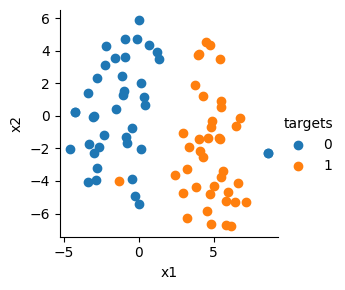

In [11]:
import seaborn as sns

grid = sns.FacetGrid(df_tsne_target,hue = "targets") #Crea un objeto de clase FacetGrid de la librería seaborn.
grid.map(plt.scatter,"x1","x2").add_legend() #Agrega un gráfico de dispersión a cada faceta del objeto FacetGrid.

In [12]:
df_tsne_target.head(80)

,x1,x2,targets
0,6.611866,-4.113020,1
1,5.500803,-3.785679,1
2,3.845456,-4.395586,1
3,5.514779,0.884576,1
4,5.434247,-1.393771,1
...,...,...,...
75,-4.257652,0.217296,0
76,-4.300358,0.234271,0
77,0.652963,4.368311,0
78,-1.594770,3.521643,0


# Perceptron

In [13]:
X = df_tsne_target[["x1", "x2"]].values
y = df_tsne_target["targets"].values

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert data to PyTorch tensors
X = torch.tensor(X).type(torch.FloatTensor)
y = torch.tensor(y).type(torch.FloatTensor)
X_train = torch.tensor(X_train).type(torch.FloatTensor)
X_test = torch.tensor(X_test).type(torch.FloatTensor)
y_train = torch.tensor(y_train).type(torch.FloatTensor)
y_test = torch.tensor(y_test).type(torch.FloatTensor)

In [15]:
class Perceptron(torch.nn.Module):
        """
            add docs
        """
    def __init__(self):
        super().__init__()

        #Definimos parametros para perceptron
        
        ### ¿por qué inicializar todos diferentes? ¿qué ventajas o desventajas tiene? ############
        self.weights = torch.zeros((2))
        self.weights_1 = torch.rand(())
        self.weights_0 = torch.rand(())
        self.bias = torch.zeros(())
        
    def activation(self, z: torch.tensor):
                #Función de activación
        if z > 0:
                y_pred = torch.ones(())
        else:
                y_pred = torch.zeros(())
        return y_pred

    def forward(self, x):
        """
            add docs
        """
        #Calculamos modelo de perceptron (W*x)

        self.weights[0] = self.weights_0
        self.weights[1] = self.weights_1

        z = torch.add(torch.dot(self.weights, x),self.bias) #w_0*x_1 + w_1*x_2 + b

        ### Es mejor dejar este tipo de métodos aislados!: ##################
        
        # def activation(self, z: torch.tensor):
        #             #Función de activación
        #     if z > 0:
        #             y_pred = torch.ones(())
        #     else:
        #             y_pred = torch.zeros(())
        #     return y_pred
            
        # #Función de activación
        # if z > 0:
        #         y_pred = torch.ones(())
        # if z <= 0:                          # cuidado con if-else ###############
        #         y_pred = torch.zeros(())
        #y_pred = activation(z)

        return activation(z)

    def _medir_(self):
        if self.weights[0] > 2:
            print("cuidado!")
            
    def backward(self, x, y, alpha):
        """
            add docs
        """
        #Actualización de parametros
        errors = torch.sub(y,self.forward(x)) #y - y_pred

        self.weights_1 = torch.add(self.weights_1, torch.mul(alpha, torch.mul(errors,x[1]))) # w + alpha*error*x_1
        self.weights_0 = torch.add(self.weights_0, torch.mul(alpha, torch.mul(errors,x[0]))) # w + alpha*error*x_0
        self.bias = torch.add(self.bias, torch.mul(alpha, errors)) #Bias

    def train(self, X, Y, epochs, alpha):
        """
            add docs
        """
        self.epochs = epochs
        #Entrenamiento
        for epoch in range(epochs):
          for x, y in zip(X, Y):
            self.backward(x, y, alpha)

    def evaluate(self, x, y):
        """
            add docs
        """
        #Evaluamos modelo
        correct = 0
        total = 0
        for i in range(len(x)):
            output = self.forward(x[i])

            if output == y[i]:
                correct += 1
            total += 1

        return [correct / total, correct, total]

    def print_(self):                #generalmente se usa _name_() para métodos privados (que no se usarán fuera de la clase)
        """
            add docs
        """
      #Imprimimos datos de interes
      print(f"Epoca: {self.epochs}")
      print(f"peso 0: {self.weights_0}")
      print(f"peso 1: {self.weights_1}")



1 epochs done!


/Users/rodolfolobocarrasco/.pyenv/versions/3.11.6/envs/ambiente-audio-2023/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


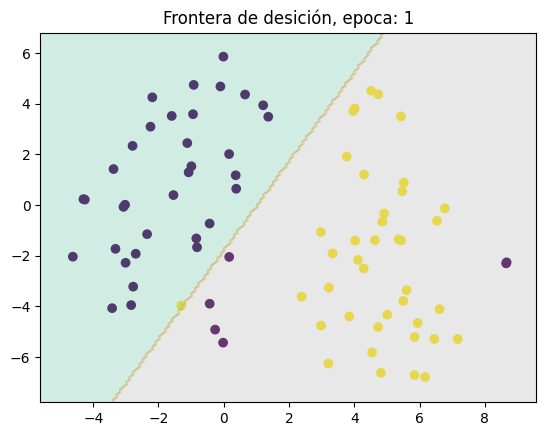

2 epochs done!


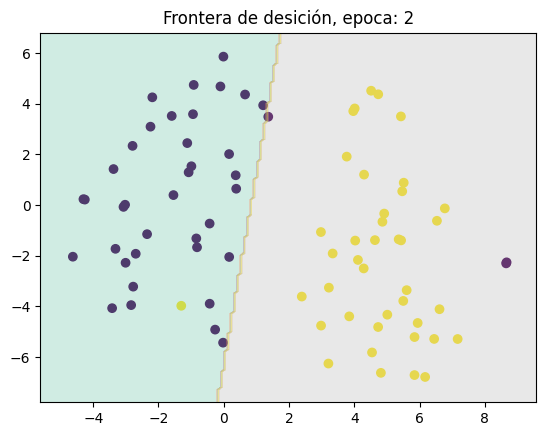

3 epochs done!


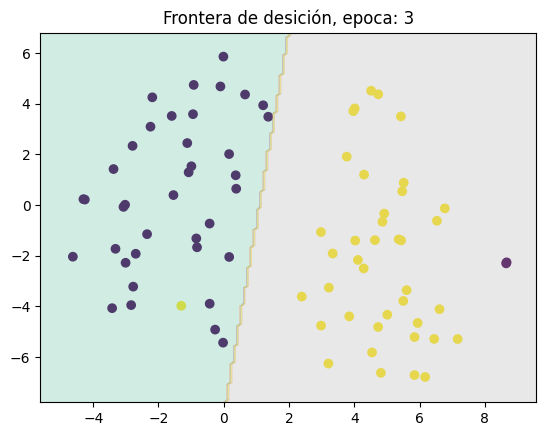

4 epochs done!


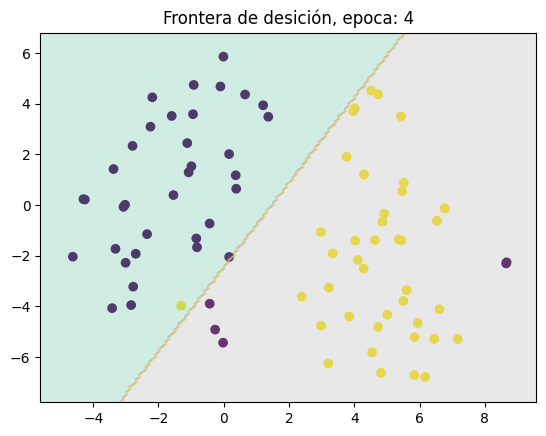

5 epochs done!


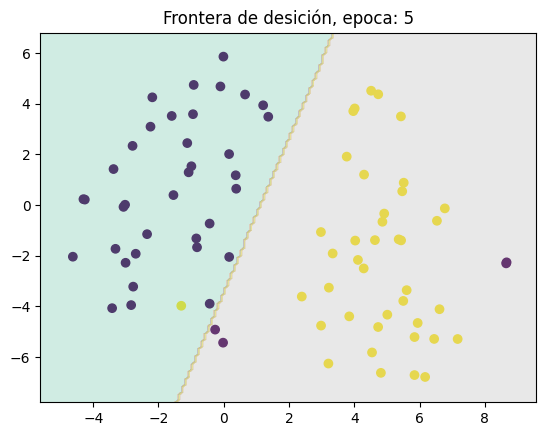

6 epochs done!


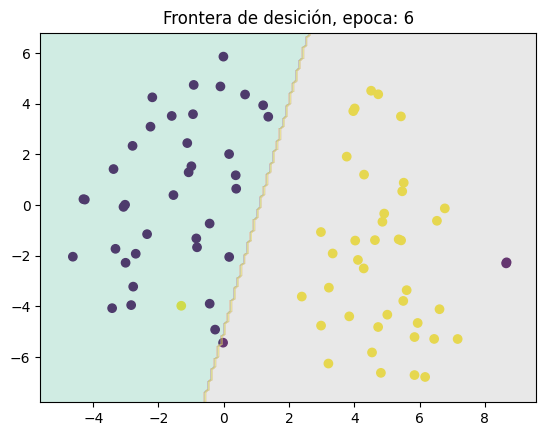

7 epochs done!


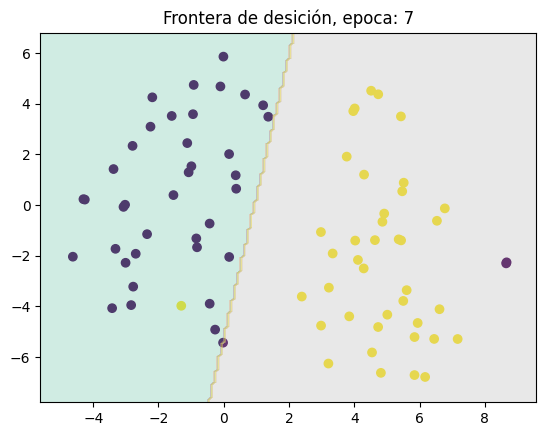

8 epochs done!


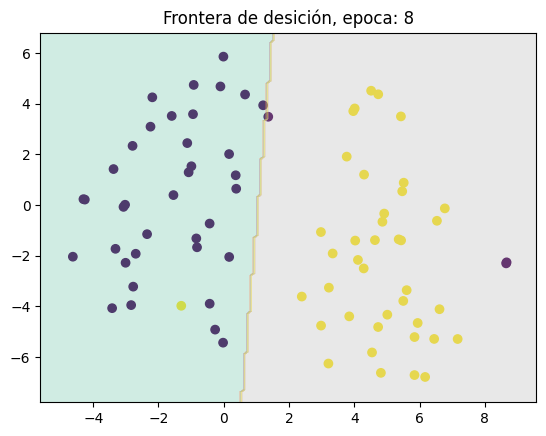

9 epochs done!


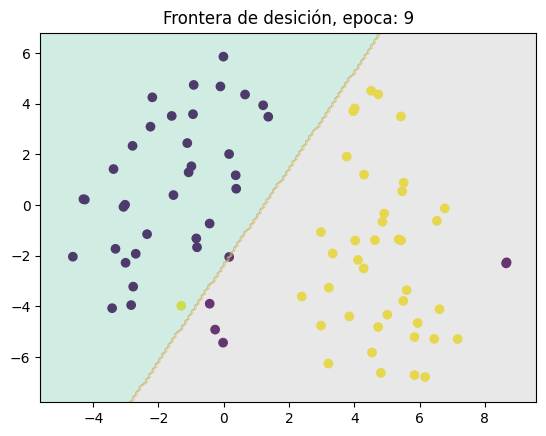

10 epochs done!


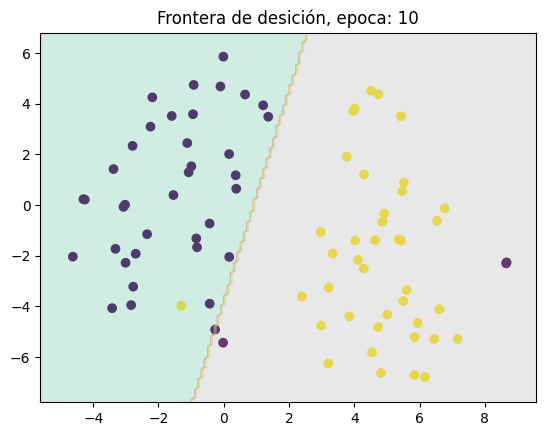

11 epochs done!


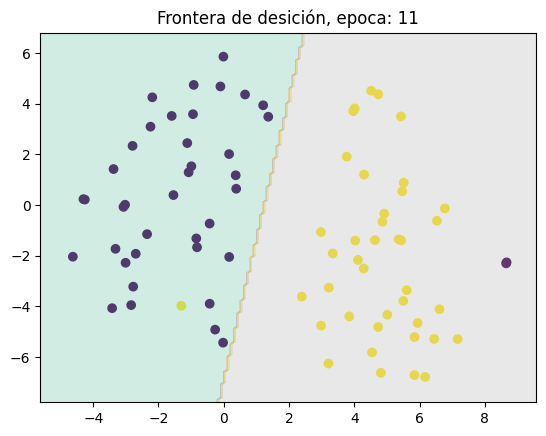

12 epochs done!


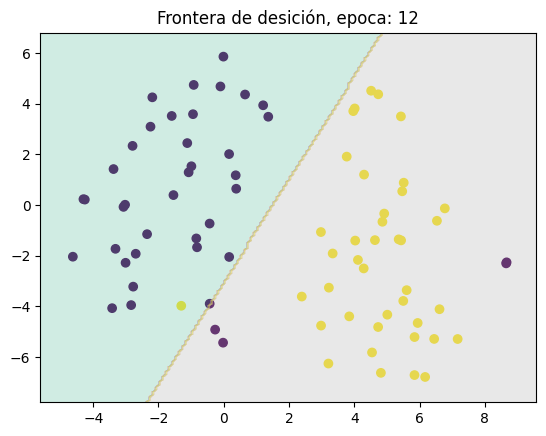

13 epochs done!


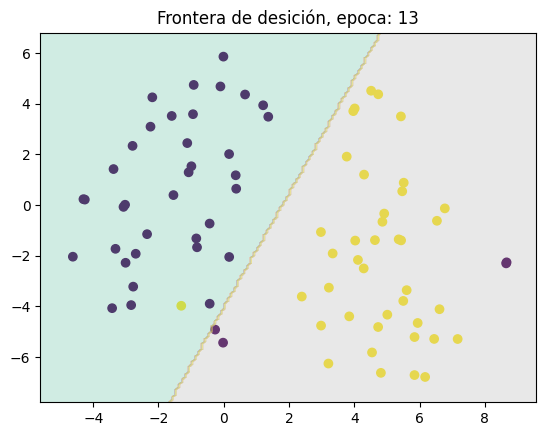

14 epochs done!


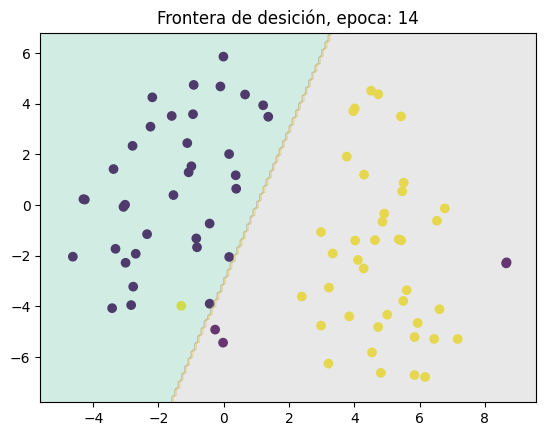

15 epochs done!


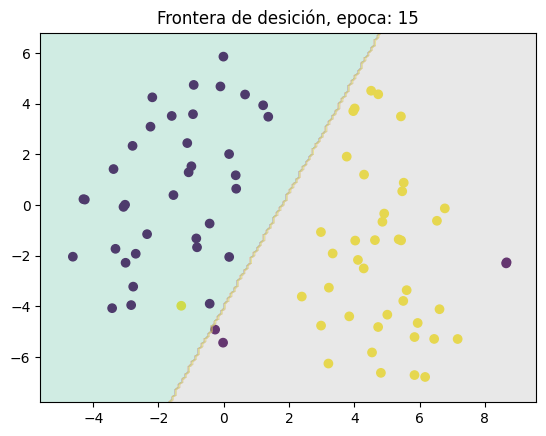

In [16]:
perceptron = Perceptron()

# Entrenamos el perceptrón
alpha = 0.01 #Learning rate
epochs = 15
repeat= 1   #Cada cuanto veces graficamos
temporal_learn = [] #Lista donde almacenamos la presicion del modelo en distintas epocas

for i in range(epochs):

  epoch = int(i+1)

  #Entrenamos
  perceptron.train(X_train, y_train, epoch, alpha)

  #Evaluamos el perceptrón
  test_accuracy = perceptron.evaluate(X, y)

  temporal_learn.append(test_accuracy[0])

  ### ¿por qué usamos mod (%) aqui? ################################################
  if epoch % repeat == 0:

      print(str(epoch)+ " " + "epochs done!") # visualizamos los resultados

      #Graficamos
      import matplotlib.pyplot as plt ############ por qué importar aqui?

      plt.scatter(X[:,0], X[:,1], c=y)

      #Graficamos la frontera de decisión
      x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

      xx1, xx2 = torch.meshgrid(torch.arange(x1_min, x1_max, 0.1), torch.arange(x2_min, x2_max, 0.1))

      xx = torch.transpose(torch.stack([xx1.flatten(), xx2.flatten()]), 0, 1)

      Z = np.array([perceptron.forward(xi) for xi in xx])

      Z = Z.reshape(xx1.shape)

      plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='Set2')

      plt.title(f"Frontera de desición, epoca: {epoch}")

      plt.show()

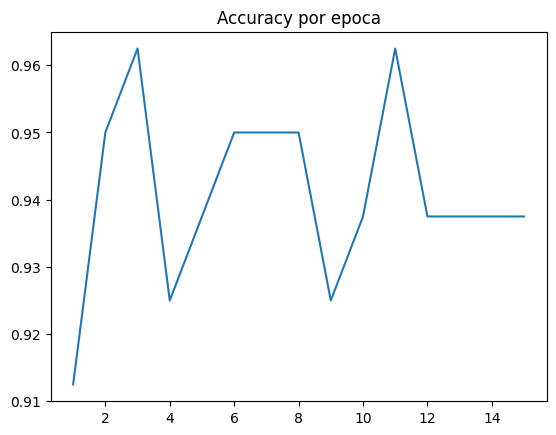

In [17]:
#Graficamos la presicion del modelo segun la epoca
plt.plot(np.array(range(len(temporal_learn)))+1, temporal_learn)
plt.title("Accuracy por epoca")
plt.show()

In [18]:
#Imprimimos datos
print("Presición/epoca:", temporal_learn)
print("Precisión en test:", test_accuracy[0])
print("Número de aciertos:", test_accuracy[1])
print("Total:", test_accuracy[2])

print("")
perceptron.print_()

Presición/epoca: [0.9125, 0.95, 0.9625, 0.925, 0.9375, 0.95, 0.95, 0.95, 0.925, 0.9375, 0.9625, 0.9375, 0.9375, 0.9375, 0.9375]
Precisión en test: 0.9375
Número de aciertos: 75
Total: 80

Epoca: 15
peso 0: 0.03909032419323921
peso 1: -0.017294112592935562


# Modelo de red neuronal

In [19]:
import sklearn
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression #regresión logística
from sklearn.neural_network import MLPClassifier    #perceptrón multicapa
from sklearn.metrics import confusion_matrix, accuracy_score # matriz de confusión y accuracy

In [20]:
class MiPrimeraRed:

    def __init__(self, hidden_layer_sizes=(5000, 10), alpha=1e-5, solver='sgd', max_iter = 1000):
        self.hidden_layer_sizes = hidden_layer_sizes  #número de capas escondidas (5000 capas y 10 neuronas)
        self.alpha = alpha #learning rate
        self.solver = solver #optimizador, por ahora utilizaremos el que conocemos Gradiente Estocástico
        self.max_iter = max_iter

        ### INICIALIZAMOS EL PERCEPTRON MULTICAPA
        self.nn = MLPClassifier(solver= self.solver,
                                alpha=self.alpha,
                                hidden_layer_sizes = self.hidden_layer_sizes,
                                max_iter = self.max_iter ,
                                random_state=1) #aleatoriedad en la generacion de los pesos y el sesgo inciales

    def train_model(self, X_train, y_train):
        try:
            ### AQUI ENTRENAMOS EL MODELO
            self.nn.fit(X_train, y_train)


            print("Modelo entrenado exitosamente!")
        except Exception as e:
            print(f"Algo ha ocurrido al momento de entrenar: {e}")

    def measuring_model_accuracy(self, X_test, y_test):

        # confirmamos que el modelo ya fue entrenado para poder medir accuracy
        if hasattr(self.nn, 'coefs_'):
            preds = self.nn.predict(X_test)
            print('Accuracy', accuracy_score(y_test, preds), '\n')
            print("Matriz de Confusión")
            print(confusion_matrix(y_test, preds))
        else:
            print('El modelo no ha sido entrenado, no es posible medir accuracy')

    def summary(self):

        # Print model configuration
        print("Model Configuration:")
        print(f"Hidden Layer Sizes: {self.hidden_layer_sizes}")
        print(f"Alpha (Learning Rate): {self.alpha}")
        print(f"Solver (Optimizer): {self.solver}")
        print(f"Max Iterations: {self.max_iter}")

        # Check if the model has been trained
        if hasattr(self.nn, 'coefs_'):
            print("\nTraining Summary:")

            # Print the number of iterations
            print(f"Number of Iterations: {self.nn.n_iter_}")

            # Print the loss
            print(f"Loss: {self.nn.loss_:.4f}")

            # Print the configuration of each layer
            for i, (coef, intercept) in enumerate(zip(self.nn.coefs_, self.nn.intercepts_), start=1):
                print(f"Layer {i}:")
                print(f" - Weights shape: {coef.shape}")
                print(f" - Biases shape: {intercept.shape}")

            # Optionally, you could add performance metrics (e.g., accuracy, confusion matrix, classification report)
            # You would need to store X_test and y_test as attributes of the class after measuring_model_accuracy is called
            # to be able to reference them here.
        else:
            print('The model has not been trained yet.')

In [21]:
Clasificador = MiPrimeraRed() #Instanciamos nuestro modelo
Clasificador.train_model(X_train,y_train) #Entrenamos
Clasificador.measuring_model_accuracy(X, y) #Evaluamos

Modelo entrenado exitosamente!
Accuracy 0.9625 

Matriz de Confusión
[[38  2]
 [ 1 39]]


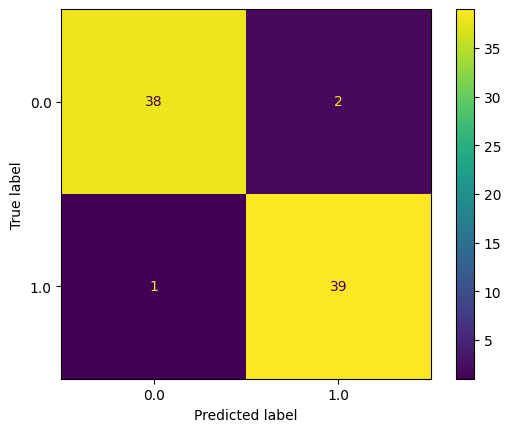

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# representar gráficamente la matriz de confusión con los datos de prueba
disp = ConfusionMatrixDisplay.from_estimator(Clasificador.nn, X, y)